In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score,confusion_matrix
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Dropout, LSTM
from tensorflow.python.keras import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,f1_score,accuracy_score

In [2]:
house_data = pd.read_excel("Clean_Data.xlsx")
house_data

,Date,Time,DateTime,System Setting,System Mode,Calendar Event,Program Mode,Cool Set Temp (C),Heat Set Temp (C),Current Temp (C),...,Thermostat Humidity (%RH),Thermostat Motion,Bedroom (C),Bedroom2,3rd floor landing (C),3rd floor landing2,3rd floor room (C),3rd floor room2,Basement (C),Basement2
0,2020-12-10,12:50:00,2020/12/10 12:50:00,heat,heatOff,auto,Home,21.0,21.0,21.3,...,30.0,1.0,21.6,0.0,20.9,0.0,21.0,0.0,22.8,0.0
1,2020-12-10,12:55:00,2020/12/10 12:55:00,heat,heatOff,auto,Home,21.0,21.0,21.1,...,32.0,1.0,21.6,0.0,20.9,0.0,20.9,0.0,22.7,1.0
2,2020-12-10,13:00:00,2020/12/10 13:00:00,heat,heatOff,auto,Home,21.0,21.0,20.9,...,32.0,0.0,21.6,0.0,20.8,0.0,20.8,0.0,22.7,1.0
3,2020-12-10,13:05:00,2020/12/10 13:05:00,heat,heatOff,auto,Home,21.0,21.0,20.7,...,33.0,0.0,21.6,0.0,20.8,0.0,20.8,0.0,22.8,0.0
4,2020-12-10,13:10:00,2020/12/10 13:10:00,heat,heatStage1On,auto,Home,21.0,21.0,20.6,...,33.0,1.0,21.6,0.0,20.8,0.0,20.8,0.0,22.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29671,2021-03-23,14:25:00,2021/3/23 14:25:00,heat,heatOff,NaN,Home,21.0,21.0,21.2,...,21.0,0.0,21.9,0.0,21.8,0.0,21.3,0.0,22.0,1.0
29672,2021-03-23,14:30:00,2021/3/23 14:30:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,21.0,0.0,21.9,0.0,21.8,0.0,21.3,0.0,22.1,0.0
29673,2021-03-23,14:35:00,2021/3/23 14:35:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,21.0,0.0,21.9,0.0,21.8,1.0,21.3,0.0,22.1,0.0
29674,2021-03-23,14:40:00,2021/3/23 14:40:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,21.0,0.0,21.9,0.0,21.8,1.0,21.3,0.0,22.1,0.0


In [3]:
house_data["Heat Stage 1 (min)"] = house_data["Heat Stage 1 (sec)"]/60
house_data

,Date,Time,DateTime,System Setting,System Mode,Calendar Event,Program Mode,Cool Set Temp (C),Heat Set Temp (C),Current Temp (C),...,Thermostat Motion,Bedroom (C),Bedroom2,3rd floor landing (C),3rd floor landing2,3rd floor room (C),3rd floor room2,Basement (C),Basement2,Heat Stage 1 (min)
0,2020-12-10,12:50:00,2020/12/10 12:50:00,heat,heatOff,auto,Home,21.0,21.0,21.3,...,1.0,21.6,0.0,20.9,0.0,21.0,0.0,22.8,0.0,0.00
1,2020-12-10,12:55:00,2020/12/10 12:55:00,heat,heatOff,auto,Home,21.0,21.0,21.1,...,1.0,21.6,0.0,20.9,0.0,20.9,0.0,22.7,1.0,0.00
2,2020-12-10,13:00:00,2020/12/10 13:00:00,heat,heatOff,auto,Home,21.0,21.0,20.9,...,0.0,21.6,0.0,20.8,0.0,20.8,0.0,22.7,1.0,0.00
3,2020-12-10,13:05:00,2020/12/10 13:05:00,heat,heatOff,auto,Home,21.0,21.0,20.7,...,0.0,21.6,0.0,20.8,0.0,20.8,0.0,22.8,0.0,2.25
4,2020-12-10,13:10:00,2020/12/10 13:10:00,heat,heatStage1On,auto,Home,21.0,21.0,20.6,...,1.0,21.6,0.0,20.8,0.0,20.8,0.0,22.8,0.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29671,2021-03-23,14:25:00,2021/3/23 14:25:00,heat,heatOff,NaN,Home,21.0,21.0,21.2,...,0.0,21.9,0.0,21.8,0.0,21.3,0.0,22.0,1.0,0.00
29672,2021-03-23,14:30:00,2021/3/23 14:30:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,0.0,21.9,0.0,21.8,0.0,21.3,0.0,22.1,0.0,0.00
29673,2021-03-23,14:35:00,2021/3/23 14:35:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,0.0,21.9,0.0,21.8,1.0,21.3,0.0,22.1,0.0,0.00
29674,2021-03-23,14:40:00,2021/3/23 14:40:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,0.0,21.9,0.0,21.8,1.0,21.3,0.0,22.1,0.0,0.00


In [4]:
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    
    n_vars = data.shape[1]
    columns = data.columns
    df = pd.DataFrame(data)
    
    df_new = pd.DataFrame()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        for j in range(n_vars):
            df_new['var%d(t-%d)' % (j+1, i)] = df.shift(i)[columns[j]]
   
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        
        for j in range(n_vars):
            if i == 0:
                name = 'var%d(t)' % (j+1)
            else:
                name = 'var%d(t+%d)' % (j+1, i)
            df_new[name] = df.shift(-i)[columns[j]]
    
    if dropnan:
        df_new.dropna(inplace=True)
    return df_new

total data correlation

In [5]:
house_data.corr()

,Cool Set Temp (C),Heat Set Temp (C),Current Temp (C),Current Humidity (%RH),Outdoor Temp (C),Wind Speed (km/h),Cool Stage 1 (sec),Heat Stage 1 (sec),Fan (sec),Thermostat Temperature (C),...,Thermostat Motion,Bedroom (C),Bedroom2,3rd floor landing (C),3rd floor landing2,3rd floor room (C),3rd floor room2,Basement (C),Basement2,Heat Stage 1 (min)
Cool Set Temp (C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heat Set Temp (C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Temp (C),NaN,NaN,1.000000,-0.050936,0.224394,NaN,NaN,-0.533121,-0.518796,1.000000,...,0.120854,0.027534,0.012867,0.327321,-0.014947,0.145654,-0.002999,-0.086888,0.028282,-0.533121
Current Humidity (%RH),NaN,NaN,-0.050936,1.000000,0.429445,NaN,NaN,-0.022963,-0.017967,-0.050936,...,-0.051489,0.492793,-0.020418,0.157072,-0.001381,0.455256,0.007348,0.764315,-0.002645,-0.022963
Outdoor Temp (C),NaN,NaN,0.224394,0.429445,1.000000,NaN,NaN,-0.242169,-0.244116,0.224394,...,0.093172,0.078521,0.004894,0.585512,-0.061094,0.400828,-0.000324,0.157771,0.048924,-0.242169
Wind Speed (km/h),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cool Stage 1 (sec),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heat Stage 1 (sec),NaN,NaN,-0.533121,-0.022963,-0.242169,NaN,NaN,1.000000,0.993693,-0.533121,...,-0.096387,-0.054004,-0.028861,-0.360813,0.010429,-0.223769,-0.011213,0.059485,-0.011577,1.000000
Fan (sec),NaN,NaN,-0.518796,-0.017967,-0.244116,NaN,NaN,0.993693,1.000000,-0.518796,...,-0.100757,-0.053840,-0.029983,-0.368794,0.011884,-0.218105,-0.012120,0.062258,-0.013597,0.993693
Thermostat Temperature (C),NaN,NaN,1.000000,-0.050936,0.224394,NaN,NaN,-0.533121,-0.518796,1.000000,...,0.120854,0.027534,0.012867,0.327321,-0.014947,0.145654,-0.002999,-0.086888,0.028282,-0.533121


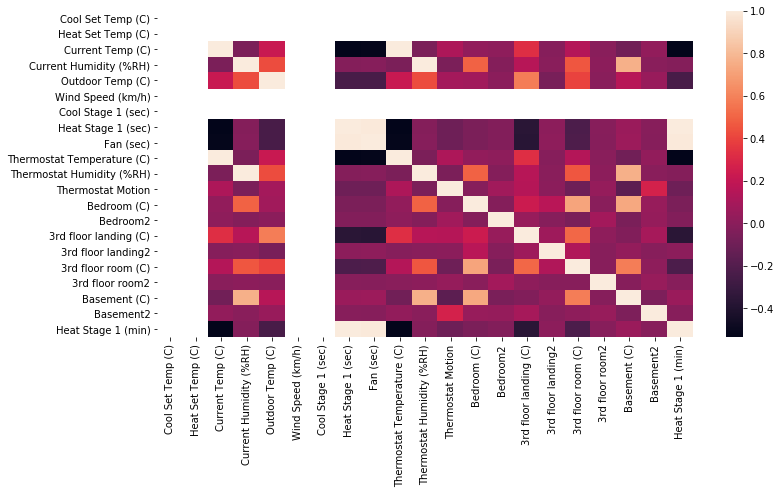

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(house_data.corr())
plt.show()

day-time correlation

In [6]:
import datetime
house_data["Time"]=pd.to_datetime(house_data["Time"], format='%H:%M:%S')

In [7]:
day_time_data = house_data[house_data['Time'].dt.hour.isin(np.arange(6, 18))]

In [8]:
day_time_data.corr()

,Cool Set Temp (C),Heat Set Temp (C),Current Temp (C),Current Humidity (%RH),Outdoor Temp (C),Wind Speed (km/h),Cool Stage 1 (sec),Heat Stage 1 (sec),Fan (sec),Thermostat Temperature (C),...,Thermostat Motion,Bedroom (C),Bedroom2,3rd floor landing (C),3rd floor landing2,3rd floor room (C),3rd floor room2,Basement (C),Basement2,Heat Stage 1 (min)
Cool Set Temp (C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heat Set Temp (C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Temp (C),NaN,NaN,1.000000,-0.114442,0.215257,NaN,NaN,-0.474130,-0.465315,1.000000,...,0.090015,-0.010257,0.005765,0.308614,-0.024089,0.069652,-0.010284,-0.094499,0.013871,-0.474130
Current Humidity (%RH),NaN,NaN,-0.114442,1.000000,0.377899,NaN,NaN,0.037469,0.043964,-0.114442,...,-0.077153,0.451741,-0.028130,0.080329,0.014174,0.476071,0.010656,0.738263,-0.012214,0.037469
Outdoor Temp (C),NaN,NaN,0.215257,0.377899,1.000000,NaN,NaN,-0.231077,-0.233480,0.215257,...,0.073954,0.110259,-0.001855,0.554245,-0.054755,0.385747,-0.007231,0.142917,0.047155,-0.231077
Wind Speed (km/h),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cool Stage 1 (sec),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heat Stage 1 (sec),NaN,NaN,-0.474130,0.037469,-0.231077,NaN,NaN,1.000000,0.993961,-0.474130,...,-0.082259,0.010052,-0.032043,-0.345981,0.007509,-0.114943,-0.008234,0.117392,0.001899,1.000000
Fan (sec),NaN,NaN,-0.465315,0.043964,-0.233480,NaN,NaN,0.993961,1.000000,-0.465315,...,-0.086912,0.011889,-0.033248,-0.354406,0.009482,-0.109559,-0.009304,0.121692,-0.000611,0.993961
Thermostat Temperature (C),NaN,NaN,1.000000,-0.114442,0.215257,NaN,NaN,-0.474130,-0.465315,1.000000,...,0.090015,-0.010257,0.005765,0.308614,-0.024089,0.069652,-0.010284,-0.094499,0.013871,-0.474130


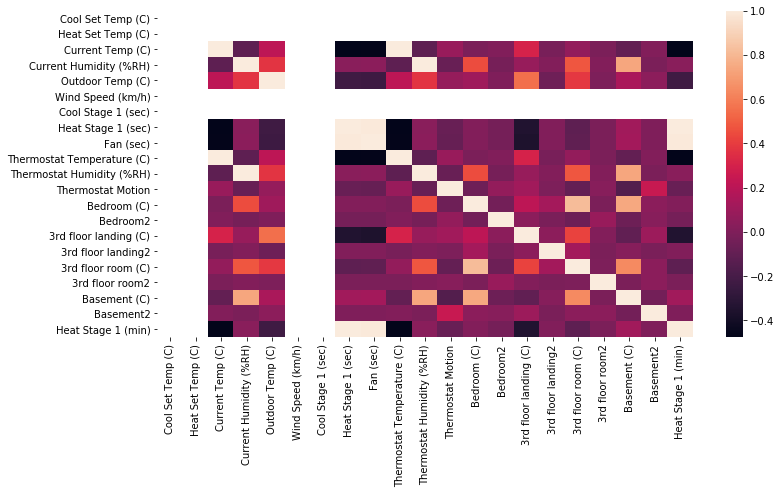

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(day_time_data.corr())
plt.show()

In [10]:
night_data = house_data[house_data['Time'].dt.hour.isin([i for i in range(0, 7)]+[i for i in range(18,24)])]

In [11]:
night_data.corr()

,Cool Set Temp (C),Heat Set Temp (C),Current Temp (C),Current Humidity (%RH),Outdoor Temp (C),Wind Speed (km/h),Cool Stage 1 (sec),Heat Stage 1 (sec),Fan (sec),Thermostat Temperature (C),...,Thermostat Motion,Bedroom (C),Bedroom2,3rd floor landing (C),3rd floor landing2,3rd floor room (C),3rd floor room2,Basement (C),Basement2,Heat Stage 1 (min)
Cool Set Temp (C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heat Set Temp (C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Temp (C),NaN,NaN,1.000000,0.077502,0.229002,NaN,NaN,-0.726140,-0.694811,1.000000,...,0.017401,0.074891,NaN,0.330375,0.001604,0.426509,NaN,0.004248,-0.006519,-0.726140
Current Humidity (%RH),NaN,NaN,0.077502,1.000000,0.503298,NaN,NaN,-0.086562,-0.083514,0.077502,...,0.013693,0.546244,NaN,0.284436,-0.018011,0.443224,NaN,0.830166,0.037840,-0.086562
Outdoor Temp (C),NaN,NaN,0.229002,0.503298,1.000000,NaN,NaN,-0.230836,-0.231184,0.229002,...,0.052300,0.023517,NaN,0.620846,-0.062942,0.473122,NaN,0.234650,0.012933,-0.230836
Wind Speed (km/h),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cool Stage 1 (sec),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heat Stage 1 (sec),NaN,NaN,-0.726140,-0.086562,-0.230836,NaN,NaN,1.000000,0.993269,-0.726140,...,-0.022619,-0.101582,NaN,-0.354518,0.012817,-0.402278,NaN,-0.055422,0.015755,1.000000
Fan (sec),NaN,NaN,-0.694811,-0.083514,-0.231184,NaN,NaN,0.993269,1.000000,-0.694811,...,-0.023160,-0.103046,NaN,-0.360607,0.014094,-0.398146,NaN,-0.056659,0.016075,0.993269
Thermostat Temperature (C),NaN,NaN,1.000000,0.077502,0.229002,NaN,NaN,-0.726140,-0.694811,1.000000,...,0.017401,0.074891,NaN,0.330375,0.001604,0.426509,NaN,0.004248,-0.006519,-0.726140


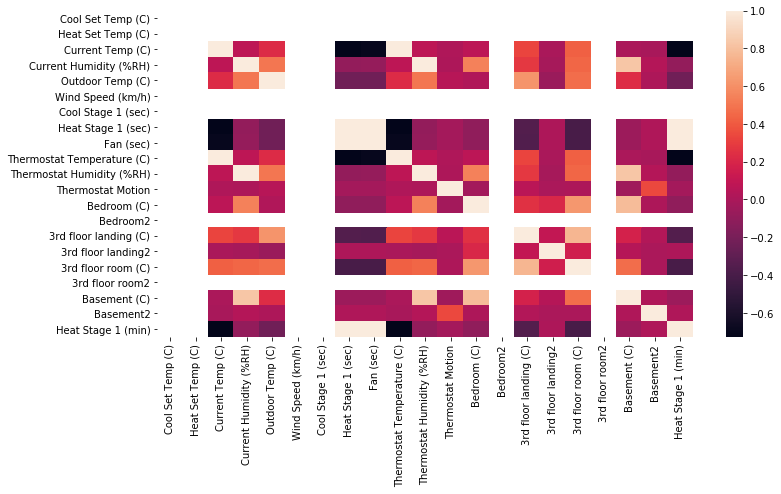

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(night_data.corr())
plt.show()

In [13]:
house_data[["Heat Stage 1 (sec)","Outdoor Temp (C)"]].corr()

,Heat Stage 1 (sec),Outdoor Temp (C)
Heat Stage 1 (sec),1.000000,-0.242169
Outdoor Temp (C),-0.242169,1.000000


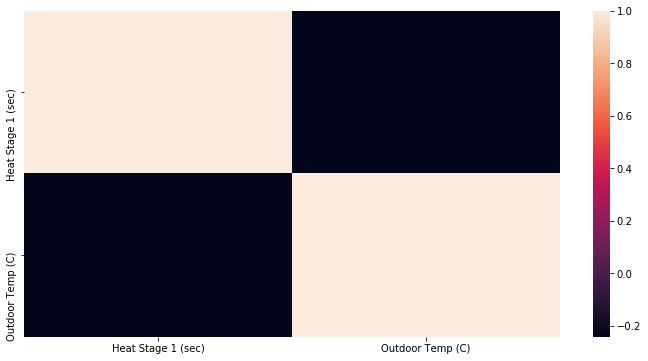

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(house_data[["Heat Stage 1 (sec)","Outdoor Temp (C)"]].corr())
plt.show()

In [15]:
day_time_data[["Heat Stage 1 (sec)","Outdoor Temp (C)"]].corr()

,Heat Stage 1 (sec),Outdoor Temp (C)
Heat Stage 1 (sec),1.000000,-0.231077
Outdoor Temp (C),-0.231077,1.000000


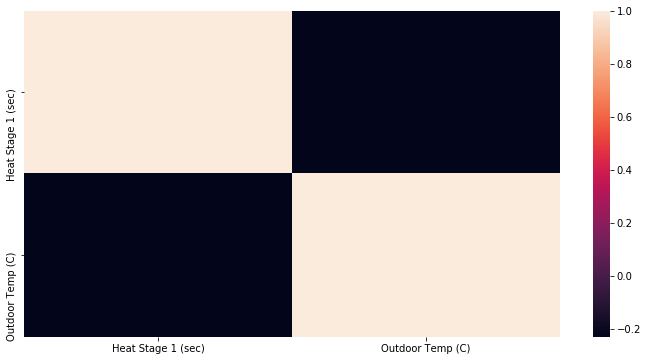

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(day_time_data[["Heat Stage 1 (sec)","Outdoor Temp (C)"]].corr())
plt.show()

In [17]:
night_data[["Heat Stage 1 (sec)","Outdoor Temp (C)"]].corr()

,Heat Stage 1 (sec),Outdoor Temp (C)
Heat Stage 1 (sec),1.000000,-0.230836
Outdoor Temp (C),-0.230836,1.000000


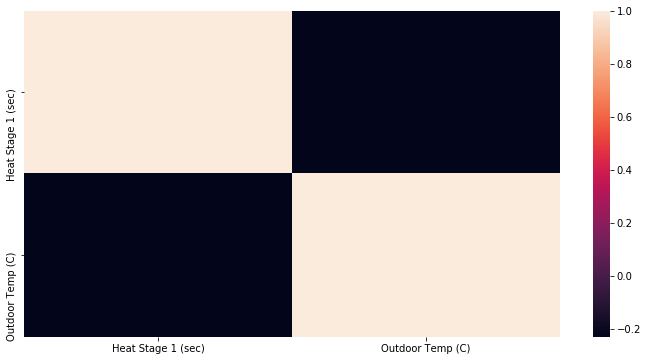

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(night_data[["Heat Stage 1 (sec)","Outdoor Temp (C)"]].corr())
plt.show()

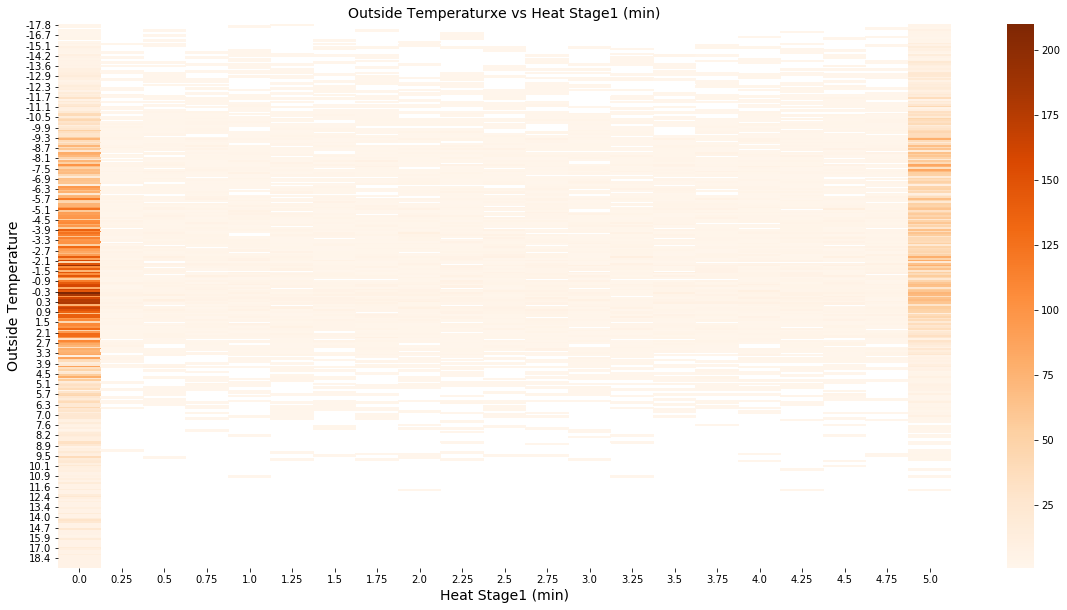

In [19]:
daily_activity_member = house_data.groupby(by = [ 'Outdoor Temp (C)','Heat Stage 1 (min)']).count()['Heat Stage 1 (sec)'].unstack()

plt.figure(figsize = (20, 10))

sns.heatmap(daily_activity_member, cmap = 'Oranges')

plt.title('Outside Temperaturxe vs Heat Stage1 (min)', fontsize = 14)
plt.xlabel('Heat Stage1 (min)', fontsize = 14)
plt.ylabel('Outside Temperature', fontsize = 14)
plt.show()

In [20]:
reframed_totle = series_to_supervised(house_data[["Outdoor Temp (C)","Heat Stage 1 (min)"]], 6, 1)
reframed_totle

,var1(t-6),var2(t-6),var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
6,5.0,0.00,5.0,0.00,5.2,0.00,5.2,2.25,5.2,5.00,5.2,5.00,5.2,5.00
7,5.0,0.00,5.2,0.00,5.2,2.25,5.2,5.00,5.2,5.00,5.2,5.00,5.2,0.75
8,5.2,0.00,5.2,2.25,5.2,5.00,5.2,5.00,5.2,5.00,5.2,0.75,5.4,0.00
9,5.2,2.25,5.2,5.00,5.2,5.00,5.2,5.00,5.2,0.75,5.4,0.00,5.4,0.00
10,5.2,5.00,5.2,5.00,5.2,5.00,5.2,0.75,5.4,0.00,5.4,0.00,5.4,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29671,14.9,0.00,15.2,0.00,15.2,0.00,15.2,0.00,15.2,0.00,15.2,0.00,15.2,0.00
29672,15.2,0.00,15.2,0.00,15.2,0.00,15.2,0.00,15.2,0.00,15.2,0.00,15.7,0.00
29673,15.2,0.00,15.2,0.00,15.2,0.00,15.2,0.00,15.2,0.00,15.7,0.00,15.7,0.00
29674,15.2,0.00,15.2,0.00,15.2,0.00,15.2,0.00,15.7,0.00,15.7,0.00,15.7,0.00


In [21]:
y_auxHeat = reframed_totle['var2(t)']
y_auxHeat = to_categorical(y_auxHeat)

In [25]:
X = reframed_totle.drop(labels = ['var2(t)'], axis = 1)
X_train = X.iloc[:23584,]
y_train = y_auxHeat[:23584,]
X_test = X.iloc[23584:]
y_test = y_auxHeat[23584:]
X_train = X_train.values
X_test = X_test.values

In [26]:
y_test.shape

(5895, 6)

In [27]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))

# Adding the second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 50, shuffle = True)

Epoch 1/50
369/369 [==============================] - 1s 2ms/step - loss: 1.0714 - accuracy: 0.6549 - val_loss: 0.6896 - val_accuracy: 0.7949
Epoch 2/50
369/369 [==============================] - 1s 2ms/step - loss: 0.7529 - accuracy: 0.7448 - val_loss: 0.6320 - val_accuracy: 0.8134
Epoch 3/50
369/369 [==============================] - 1s 2ms/step - loss: 0.7116 - accuracy: 0.7523 - val_loss: 0.6394 - val_accuracy: 0.8187
Epoch 4/50
369/369 [==============================] - 1s 1ms/step - loss: 0.6917 - accuracy: 0.7569 - val_loss: 0.5760 - val_accuracy: 0.8204
Epoch 5/50
369/369 [==============================] - 1s 2ms/step - loss: 0.6791 - accuracy: 0.7584 - val_loss: 0.6611 - val_accuracy: 0.8059
Epoch 6/50
369/369 [==============================] - 1s 2ms/step - loss: 0.6691 - accuracy: 0.7607 - val_loss: 0.5581 - val_accuracy: 0.8237
Epoch 7/50
369/369 [==============================] - 1s 2ms/step - loss: 0.6608 - accuracy: 0.7600 - val_loss: 0.5688 - val_accuracy: 0.8239
Epoch 

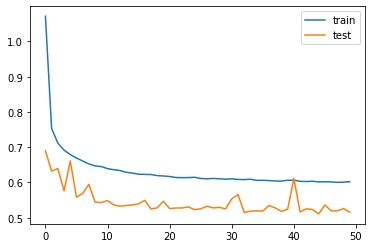

In [28]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.xlabel("epochs")
plt.ylabel("loss/var_loss")
plt.legend()
plt.savefig("14.png")
plt.show()

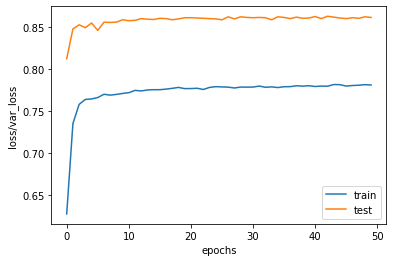

In [50]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss/var_loss")
plt.savefig("9.png")
plt.show()

In [51]:
y_predicted = classifier.predict(X_test)

In [52]:
y_predicted = np.argmax(y_predicted, axis = 1)
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
y_test = np.argmax(y_test, axis = 1)

In [54]:
test_sum = y_test.sum()*15
predicted_sum = y_predicted.sum()*15

In [55]:
print("Error Percentage in predicted values is : {} %".format(np.absolute((predicted_sum - test_sum)/test_sum)*100))

Error Percentage in predicted values is : 16.966904063678257 %


In [56]:
y_train_predicted = classifier.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis = 1)
y_train = np.argmax(y_train, axis = 1)

In [57]:
f1_score(y_train, y_train_predicted, average = 'weighted')

0.7167734062275763

In [58]:
accuracy_score(y_train, y_train_predicted)

0.7820362294532036

In [59]:
mean_absolute_error(y_train, y_train_predicted)

0.5296880241529688

In [60]:
mean_absolute_error(y_test, y_predicted)

0.37289915966386555

In [61]:
accuracy_score(y_test, y_predicted)

0.8609943977591037

In [62]:
f1_score(y_test, y_predicted, average = 'weighted')

0.8179900862366037

### Daytime

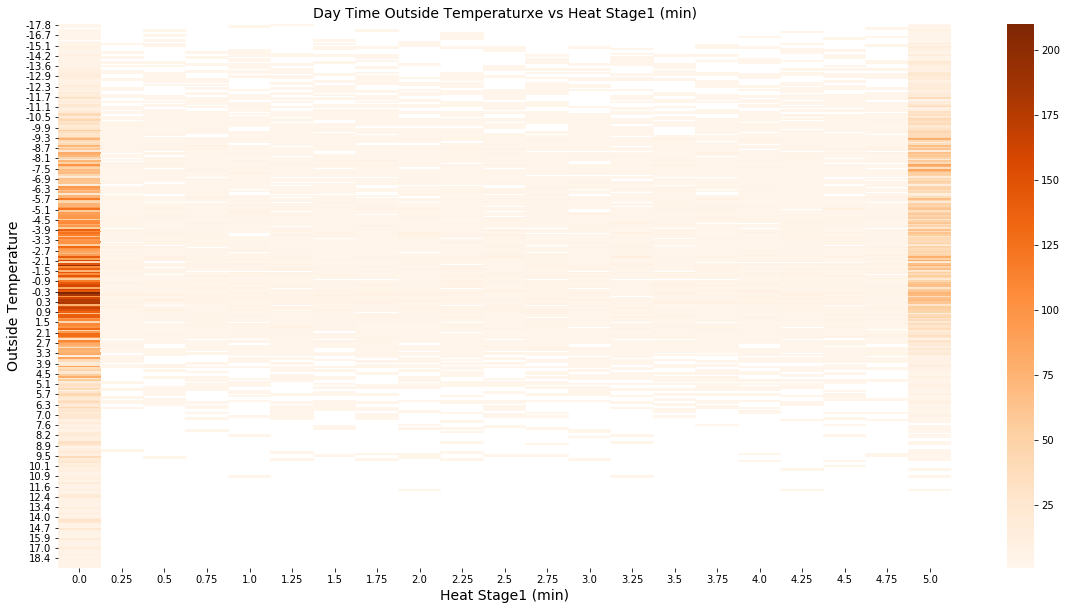

In [63]:
daytime_daily_activity_member = day_time_data.groupby(by = [ 'Outdoor Temp (C)','Heat Stage 1 (min)']).count()['Heat Stage 1 (sec)'].unstack()

plt.figure(figsize = (20, 10))

sns.heatmap(daily_activity_member, cmap = 'Oranges')

plt.title('Day Time Outside Temperaturxe vs Heat Stage1 (min)', fontsize = 14)
plt.xlabel('Heat Stage1 (min)', fontsize = 14)
plt.ylabel('Outside Temperature', fontsize = 14)
plt.show()

In [64]:
reframed_daytime = series_to_supervised(day_time_data[["Outdoor Temp (C)","Heat Stage 1 (min)"]], 6, 1)
reframed_daytime

,var1(t-6),var2(t-6),var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
6,5.0,0.00,5.0,0.00,5.2,0.00,5.2,2.25,5.2,5.00,5.2,5.00,5.2,5.00
7,5.0,0.00,5.2,0.00,5.2,2.25,5.2,5.00,5.2,5.00,5.2,5.00,5.2,0.75
8,5.2,0.00,5.2,2.25,5.2,5.00,5.2,5.00,5.2,5.00,5.2,0.75,5.4,0.00
9,5.2,2.25,5.2,5.00,5.2,5.00,5.2,5.00,5.2,0.75,5.4,0.00,5.4,0.00
10,5.2,5.00,5.2,5.00,5.2,5.00,5.2,0.75,5.4,0.00,5.4,0.00,5.4,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29671,14.9,0.00,15.2,0.00,15.2,0.00,15.2,0.00,15.2,0.00,15.2,0.00,15.2,0.00
29672,15.2,0.00,15.2,0.00,15.2,0.00,15.2,0.00,15.2,0.00,15.2,0.00,15.7,0.00
29673,15.2,0.00,15.2,0.00,15.2,0.00,15.2,0.00,15.2,0.00,15.7,0.00,15.7,0.00
29674,15.2,0.00,15.2,0.00,15.2,0.00,15.2,0.00,15.7,0.00,15.7,0.00,15.7,0.00


In [65]:
y_auxHeat = reframed_daytime['var2(t)']
y_auxHeat = to_categorical(y_auxHeat)

In [66]:
X = reframed_daytime.drop(labels = ['var2(t)'], axis = 1)
X_train = X.iloc[:11924,]
y_train = y_auxHeat[:11924,]
X_test = X.iloc[11924:]
y_test = y_auxHeat[11924:]
X_train = X_train.values
X_test = X_test.values

In [67]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))

# Adding the second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 50, shuffle = True)

Epoch 1/50
187/187 [==============================] - 1s 2ms/step - loss: 1.3149 - accuracy: 0.5850 - val_loss: 0.7894 - val_accuracy: 0.8067
Epoch 2/50
187/187 [==============================] - 0s 2ms/step - loss: 0.9628 - accuracy: 0.7122 - val_loss: 0.6546 - val_accuracy: 0.8232
Epoch 3/50
187/187 [==============================] - 0s 2ms/step - loss: 0.8102 - accuracy: 0.7536 - val_loss: 0.5868 - val_accuracy: 0.8533
Epoch 4/50
187/187 [==============================] - 0s 2ms/step - loss: 0.7763 - accuracy: 0.7620 - val_loss: 0.5891 - val_accuracy: 0.8515
Epoch 5/50
187/187 [==============================] - 0s 2ms/step - loss: 0.7612 - accuracy: 0.7664 - val_loss: 0.7127 - val_accuracy: 0.7703
Epoch 6/50
187/187 [==============================] - 0s 2ms/step - loss: 0.7523 - accuracy: 0.7660 - val_loss: 0.6205 - val_accuracy: 0.8410
Epoch 7/50
187/187 [==============================] - 0s 2ms/step - loss: 0.7393 - accuracy: 0.7685 - val_loss: 0.6756 - val_accuracy: 0.7892
Epoch 

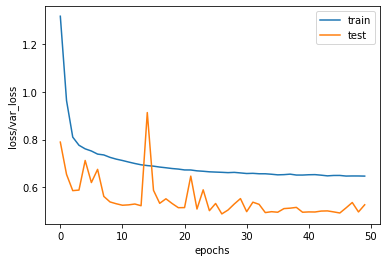

In [68]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss/var_loss")
plt.savefig("16.png")
plt.show()

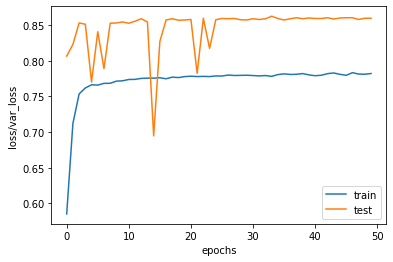

In [69]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss/var_loss")
plt.savefig("17.png")
plt.show()

In [70]:
y_predicted = classifier.predict(X_test)

In [71]:
y_predicted = np.argmax(y_predicted, axis = 1)

In [72]:
y_test = np.argmax(y_test, axis = 1)

In [73]:
test_sum = y_test.sum()*15
predicted_sum = y_predicted.sum()*15
print("Error Percentage in predicted values is : {} %".format(np.absolute((predicted_sum - test_sum)/test_sum)*100))

Error Percentage in predicted values is : 19.312945119396733 %


In [74]:
y_train_predicted = classifier.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis = 1)
y_train = np.argmax(y_train, axis = 1)

In [75]:
f1_score(y_train, y_train_predicted, average = 'weighted')

0.7138443423481241

In [76]:
accuracy_score(y_train, y_train_predicted)

0.7800234820530023

In [77]:
mean_absolute_error(y_train, y_train_predicted)

0.5449513586044952

In [78]:
mean_absolute_error(y_test, y_predicted)

0.3707983193277311

In [79]:
accuracy_score(y_test, y_predicted)

0.8599439775910365

In [80]:
f1_score(y_test, y_predicted, average = 'weighted')

0.8155656969467757

### Night

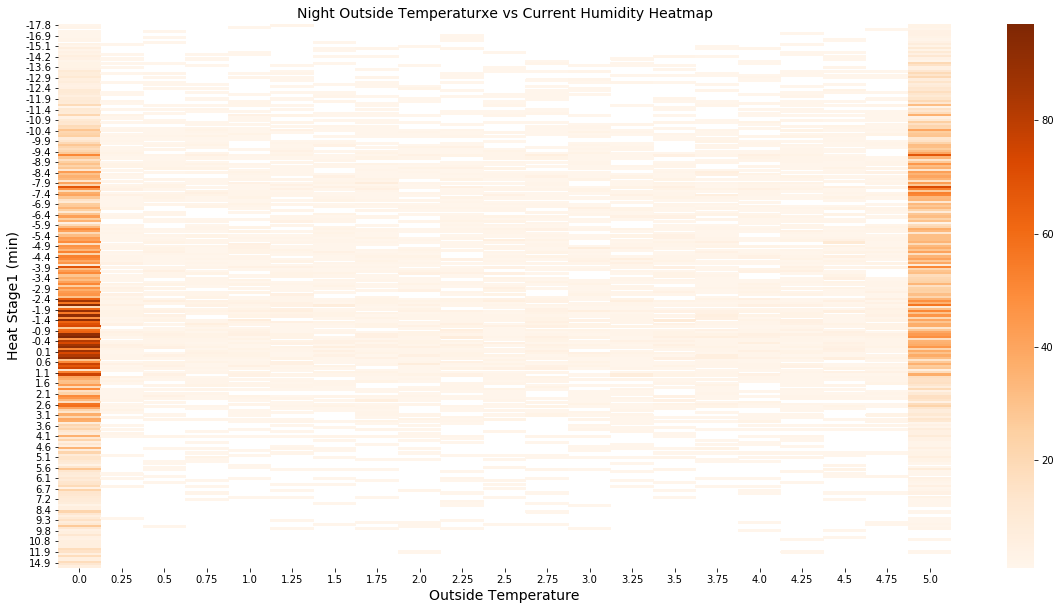

In [81]:
night_daily_activity_member = night_data.groupby(by = [ 'Outdoor Temp (C)','Heat Stage 1 (min)']).count()['Heat Stage 1 (sec)'].unstack()

plt.figure(figsize = (20, 10))

sns.heatmap(night_daily_activity_member, cmap = 'Oranges')

plt.title('Night Outside Temperaturxe vs Current Humidity Heatmap', fontsize = 14)
plt.ylabel('Heat Stage1 (min)', fontsize = 14)
plt.xlabel('Outside Temperature', fontsize = 14)
plt.show()

In [82]:
reframed_night_data = series_to_supervised(night_data[["Outdoor Temp (C)","Heat Stage 1 (min)"]], 6, 1)
reframed_night_data

,var1(t-6),var2(t-6),var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
68,3.4,3.50,3.4,5.00,3.4,5.00,3.4,1.50,3.4,0.00,3.4,0.00,3.4,0.00
69,3.4,5.00,3.4,5.00,3.4,1.50,3.4,0.00,3.4,0.00,3.4,0.00,3.4,1.25
70,3.4,5.00,3.4,1.50,3.4,0.00,3.4,0.00,3.4,0.00,3.4,1.25,3.4,5.00
71,3.4,1.50,3.4,0.00,3.4,0.00,3.4,0.00,3.4,1.25,3.4,5.00,3.4,5.00
72,3.4,0.00,3.4,0.00,3.4,0.00,3.4,1.25,3.4,5.00,3.4,5.00,3.4,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29577,3.7,0.00,3.7,0.00,3.7,3.25,3.7,5.00,3.7,3.50,3.4,0.00,3.4,0.00
29578,3.7,0.00,3.7,3.25,3.7,5.00,3.7,3.50,3.4,0.00,3.4,0.00,3.4,0.00
29579,3.7,3.25,3.7,5.00,3.7,3.50,3.4,0.00,3.4,0.00,3.4,0.00,3.4,0.00
29580,3.7,5.00,3.7,3.50,3.4,0.00,3.4,0.00,3.4,0.00,3.4,0.00,3.4,1.25


In [83]:
y_auxHeat = reframed_night_data['var2(t)']
y_auxHeat = to_categorical(y_auxHeat)

In [84]:
X = reframed_night_data.drop(labels = ['var2(t)'], axis = 1)
X_train = X.iloc[:12725,]
y_train = y_auxHeat[:12725,]
X_test = X.iloc[12725:]
y_test = y_auxHeat[12725:]
X_train = X_train.values
X_test = X_test.values

In [85]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))

# Adding the second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 50, shuffle = True)

Epoch 1/50
199/199 [==============================] - 1s 2ms/step - loss: 1.2796 - accuracy: 0.5509 - val_loss: 0.8687 - val_accuracy: 0.7466
Epoch 2/50
199/199 [==============================] - 0s 2ms/step - loss: 0.7990 - accuracy: 0.7312 - val_loss: 0.7834 - val_accuracy: 0.6888
Epoch 3/50
199/199 [==============================] - 0s 2ms/step - loss: 0.7335 - accuracy: 0.7372 - val_loss: 0.8280 - val_accuracy: 0.6881
Epoch 4/50
199/199 [==============================] - 0s 2ms/step - loss: 0.7125 - accuracy: 0.7412 - val_loss: 0.7875 - val_accuracy: 0.6976
Epoch 5/50
199/199 [==============================] - 1s 3ms/step - loss: 0.7018 - accuracy: 0.7432 - val_loss: 0.8128 - val_accuracy: 0.6925
Epoch 6/50
199/199 [==============================] - 1s 3ms/step - loss: 0.6899 - accuracy: 0.7459 - val_loss: 0.7092 - val_accuracy: 0.7686
Epoch 7/50
199/199 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.7486 - val_loss: 0.6991 - val_accuracy: 0.7759
Epoch 

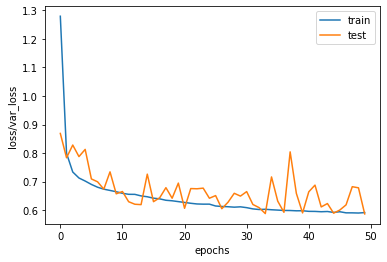

In [86]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss/var_loss")
plt.savefig("17.png")
plt.show()

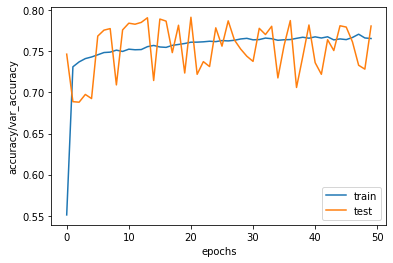

In [87]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy/var_accuracy")
plt.savefig("18.png")
plt.show()

In [88]:
y_predicted = classifier.predict(X_test)

In [89]:
y_predicted = np.argmax(y_predicted, axis = 1)
y_predicted

array([5, 3, 0, ..., 0, 0, 5], dtype=int64)

In [90]:
y_test = np.argmax(y_test, axis = 1)

In [91]:
test_sum = y_test.sum()*15
predicted_sum = y_predicted.sum()*15
print("Error Percentage in predicted values is : {} %".format(np.absolute((predicted_sum - test_sum)/test_sum)*100))

Error Percentage in predicted values is : 0.019135093761959435 %


In [92]:
y_train_predicted = classifier.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis = 1)
y_train = np.argmax(y_train, axis = 1)

In [93]:
f1_score(y_train, y_train_predicted, average = 'weighted')

0.7297452265755869

In [94]:
accuracy_score(y_train, y_train_predicted)

0.76762278978389

In [95]:
mean_absolute_error(y_train, y_train_predicted)

0.44275049115913556

In [96]:
accuracy_score(y_test, y_predicted)

0.780886513674945

In [97]:
f1_score(y_test, y_predicted, average = 'weighted')

0.7537842519033935